# Applying SVD to compress images
https://math.mit.edu/~gs/linearalgebra/linearalgebra5_7-1.pdf
http://www.math.utah.edu/~goller/F15_M2270/BradyMathews_SVDImage.pdf

In [328]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
%matplotlib inline

In [329]:
# Defining the load and display functions
def load(path):
    out = io.imread(path)
    out = out.astype(np.float64)/255
    return out

def display(image):
    plt.figure(figsize = (10, 10))
    plt.axis('off')
    plt.imshow(image)

In [330]:
# defining svd to get u, s(sigma), v.
def get_svd(image):
    u, s, v = np.linalg.svd(image)
    return u, s, v

In [333]:
def rgb_exclusion(image, channel):
    out = image.copy()
    if channel == 'R':
        out[:, :, 1:] = 0
        return out.copy()
    elif channel == 'G':
        out[:, :, ::2] = 0
        return out.copy()
    elif channel == 'B':
        out[:, :, :2] = 0
        return out.copy()
    
def get_rgb(image, channel):
    out = image.copy()
    red = out[:, :, 0].copy()
    green = out[:, :, 1].copy()
    blue = out[:, :, 2].copy()
    if channel == 'R':
        return red
    elif channel == 'G':
        return green
    elif channel == 'B':
        return blue
    return (red, green, blue)


In [336]:
def svd_compression(image, rank:int):
    row, col, dim = image.shape
    red = get_rgb(image, 'R')
    blue = get_rgb(image, 'B')
    green = get_rgb(image, 'G')
    channels = (red, green, blue)
    
    image = np.zeros((row, col, 3))
    subimages = []
    for colour in channels:
        u, s, v = get_svd(colour)
        u = u[:, :rank]
        s = s[:rank]
        v = v[:rank, :]
        subimages.append(np.dot(u, np.dot(np.diag(s), v)))
    image[: ,:, 0] = subimages[0]
    image[:, :, 1] = subimages[1]
    image[:, :, 2] = subimages[2]
    return image
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


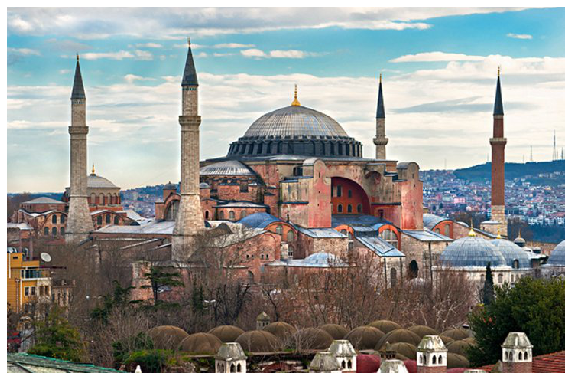

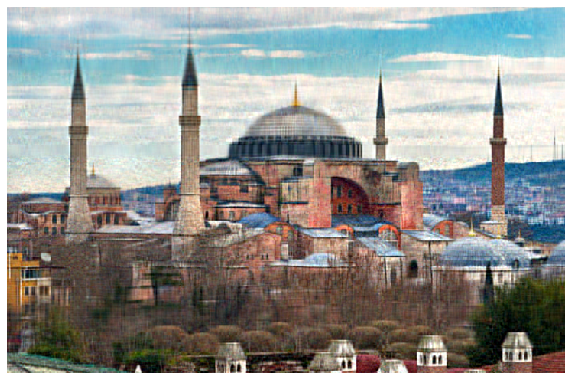

In [346]:
ayasofya = load('ayasofya.jpg')
display(ayasofya)
display(svd_compression(ayasofya, 50))

In [340]:
parrot = load('parrot.jpg')

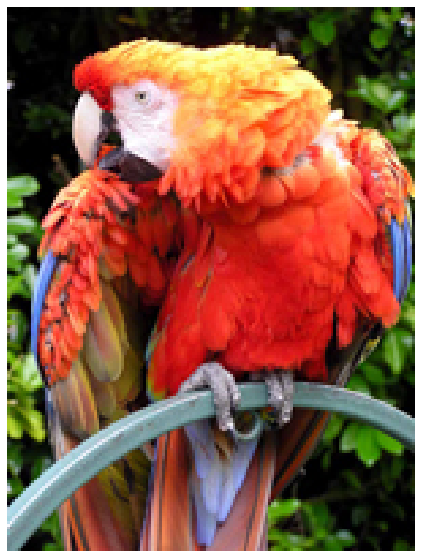

In [341]:
display(parrot)

In [342]:
compressedparrot = svd_compression(parrot, 20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


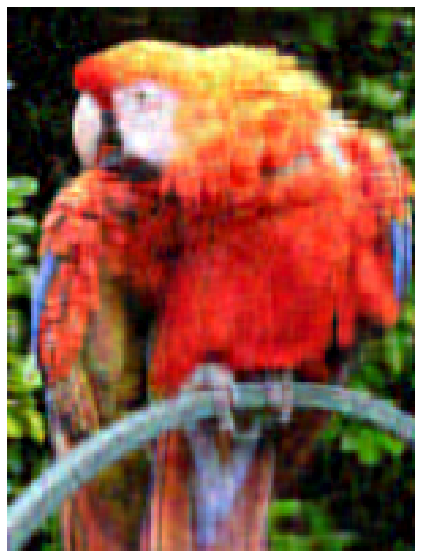

In [343]:
display(compressedparrot)